In [ ]:
import scipy.io
import pandas as pd
import os
import h5py
from google.colab import drive
from scipy.interpolate import interp1d

# Mount Google Drive
drive.mount('/content/drive')

# Define the base path to the dataset
base_path = '/content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging'
drive_folders = [f'Folder{i}' for i in [2, 4, 6, 8, 10, 12, 14, 16]]

# Function to load and align data from a .mat file
def load_mat_file(folder_path):
    mat_file_path = os.path.join(folder_path, 'Raw.mat')
    if os.path.exists(mat_file_path):
        try:
            with h5py.File(mat_file_path, 'r') as f:
                print(f"Keys in {mat_file_path}: {list(f.keys())}")
                data_key = next((key for key in f.keys() if not key.startswith('#')), None)

                if data_key:
                    raw_data = f[data_key]
                    try:
                        time_curr = raw_data['TimeCurr'][:].flatten()
                        curr = raw_data['Curr'][:].flatten()
                        time_volt = raw_data['TimeVolt'][:].flatten()
                        volt = raw_data['Volt'][:].flatten()
                        time_soc = raw_data['TimeSoC'][:].flatten()
                        soc = raw_data['SoC'][:].flatten()
                        time_temp = raw_data['TimeTemp'][:].flatten()
                        temp = raw_data['Temp'][:].flatten()
                        time_epoch = raw_data['TimeEpoch'][:].flatten()
                        epoch = raw_data['Epoch'][:].flatten()

                        aligned_time = time_epoch

                        aligned_curr = interp1d(time_curr, curr, kind='linear', fill_value="extrapolate")(aligned_time)
                        aligned_volt = interp1d(time_volt, volt, kind='linear', fill_value="extrapolate")(aligned_time)
                        aligned_soc = interp1d(time_soc, soc, kind='linear', fill_value="extrapolate")(aligned_time)
                        aligned_temp = interp1d(time_temp, temp, kind='linear', fill_value="extrapolate")(aligned_time)

                        data = {
                            'TimeEpoch': aligned_time,
                            'Epoch': epoch,
                            'Curr': aligned_curr,
                            'Volt': aligned_volt,
                            'SoC': aligned_soc,
                            'Temp': aligned_temp
                        }
                        df = pd.DataFrame(data)
                        return df
                    except Exception as e:
                        print(f"Error extracting or aligning data from {mat_file_path}: {e}")
                        return None
                else:
                    print(f"Could not find main data key in {mat_file_path}")
                    return None
        except Exception as e:
            print(f"Error loading .mat file with h5py from {mat_file_path}: {e}")
            return None
    else:
        print(f"File not found: {mat_file_path}")
        return None

# Load data from all drive folders
all_drive_dfs = []
print("Loading data from Drive folders...")
for folder in drive_folders:
    folder_path = os.path.join(base_path, 'Drive', folder)
    df = load_mat_file(folder_path)
    if df is not None:
        df['Source_Folder'] = folder
        df['Data_Type'] = 'Drive'
        all_drive_dfs.append(df)

# Combine all drive data
all_drive_data_df = pd.concat(all_drive_dfs, ignore_index=True)

print("\nAll Drive folder data loaded and combined successfully:")
display(all_drive_data_df.head())
display(all_drive_data_df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from Drive folders...
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging/Drive/Folder2/Raw.mat: ['#refs#', 'Raw']
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging/Drive/Folder4/Raw.mat: ['#refs#', 'Raw']
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging/Drive/Folder6/Raw.mat: ['#refs#', 'Raw']
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging/Drive/Folder8/Raw.mat: ['#refs#', 'Raw']
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving and charging/Drive/Folder10/Raw.mat: ['#refs#', 'Raw']
Keys in /content/drive/MyDrive/EV Project Davise Lab/Real-world electric vehicle data driving a

,TimeEpoch,Epoch,Curr,Volt,SoC,Temp,Source_Folder,Data_Type
0,10.241636,1.572642e+09,0.0,448.75,94.95,23.0,Folder2,Drive
1,12.241688,1.572642e+09,0.0,448.75,94.95,23.0,Folder2,Drive
2,13.241669,1.572642e+09,0.0,448.75,94.95,23.0,Folder2,Drive
3,14.241700,1.572642e+09,0.0,448.75,94.95,23.0,Folder2,Drive
4,15.241731,1.572642e+09,6.0,448.50,94.95,23.0,Folder2,Drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273550 entries, 0 to 273549
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeEpoch      273550 non-null  float64
 1   Epoch          273550 non-null  float64
 2   Curr           273550 non-null  float64
 3   Volt           273550 non-null  float64
 4   SoC            273550 non-null  float64
 5   Temp           273550 non-null  float64
 6   Source_Folder  273550 non-null  object 
 7   Data_Type      273550 non-null  object 
dtypes: float64(6), object(2)
memory usage: 16.7+ MB


None

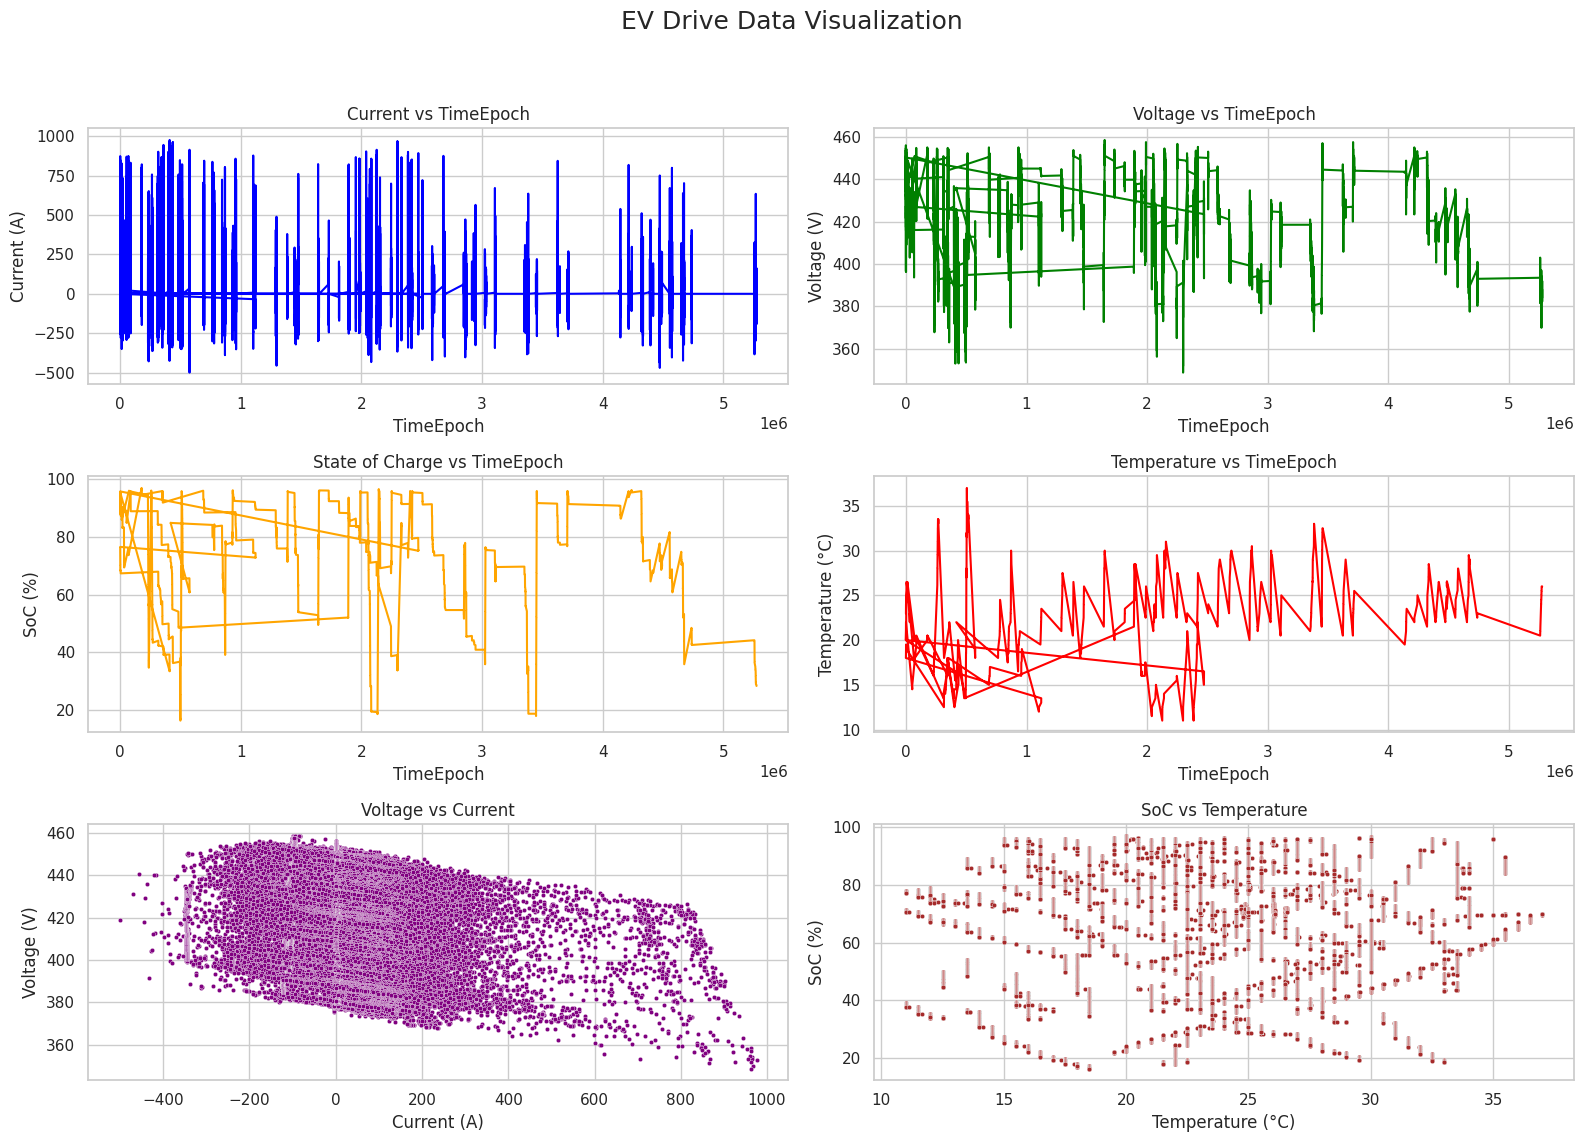

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Optional: Convert Epoch to datetime if it's in UNIX timestamp format
# all_drive_data_df['Epoch'] = pd.to_datetime(all_drive_data_df['Epoch'], unit='s')

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('EV Drive Data Visualization', fontsize=18)

# Plot Current vs TimeEpoch
axs[0, 0].plot(all_drive_data_df['TimeEpoch'], all_drive_data_df['Curr'], color='blue')
axs[0, 0].set_title('Current vs TimeEpoch')
axs[0, 0].set_xlabel('TimeEpoch')
axs[0, 0].set_ylabel('Current (A)')

# Plot Voltage vs TimeEpoch
axs[0, 1].plot(all_drive_data_df['TimeEpoch'], all_drive_data_df['Volt'], color='green')
axs[0, 1].set_title('Voltage vs TimeEpoch')
axs[0, 1].set_xlabel('TimeEpoch')
axs[0, 1].set_ylabel('Voltage (V)')

# Plot SoC vs TimeEpoch
axs[1, 0].plot(all_drive_data_df['TimeEpoch'], all_drive_data_df['SoC'], color='orange')
axs[1, 0].set_title('State of Charge vs TimeEpoch')
axs[1, 0].set_xlabel('TimeEpoch')
axs[1, 0].set_ylabel('SoC (%)')

# Plot Temperature vs TimeEpoch
axs[1, 1].plot(all_drive_data_df['TimeEpoch'], all_drive_data_df['Temp'], color='red')
axs[1, 1].set_title('Temperature vs TimeEpoch')
axs[1, 1].set_xlabel('TimeEpoch')
axs[1, 1].set_ylabel('Temperature (°C)')

# Plot Voltage vs Current (scatter)
sns.scatterplot(x='Curr', y='Volt', data=all_drive_data_df, ax=axs[2, 0], color='purple', s=10)
axs[2, 0].set_title('Voltage vs Current')
axs[2, 0].set_xlabel('Current (A)')
axs[2, 0].set_ylabel('Voltage (V)')

# Plot SoC vs Temperature (scatter)
sns.scatterplot(x='Temp', y='SoC', data=all_drive_data_df, ax=axs[2, 1], color='brown', s=10)
axs[2, 1].set_title('SoC vs Temperature')
axs[2, 1].set_xlabel('Temperature (°C)')
axs[2, 1].set_ylabel('SoC (%)')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Basic stats
min_val = df['DischargeRate'].min()
max_val = df['DischargeRate'].max()
mean_val = df['DischargeRate'].mean()
median_val = df['DischargeRate'].median()

print(f"Min: {min_val:.2e}")
print(f"Max: {max_val:.2e}")
print(f"Mean: {mean_val:.2e}")
print(f"Median: {median_val:.2e}")


Min: -3.19e+00
Max: 3.45e+00
Mean: 2.52e-03
Median: -0.00e+00


In [ ]:
# Basic stats
min_val = df['SoC'].min()
max_val = df['SoC'].max()
mean_val = df['SoC'].mean()
median_val = df['SoC'].median()

print(f"Min: {min_val:.2e}")
print(f"Max: {max_val:.2e}")
print(f"Mean: {mean_val:.2e}")
print(f"Median: {median_val:.2e}")

Min: 1.62e+01
Max: 9.71e+01
Mean: 7.01e+01
Median: 7.40e+01


# EV Drive Data Analysis

## 1. Current vs TimeEpoch
📈 **Observation**:  
Current fluctuates heavily between -500 A to +1000 A.

⚡ **Interpretation**:  
These spikes likely represent acceleration (positive current) and regenerative braking (negative current). The variability suggests dynamic driving conditions.

---

## 2. Voltage vs TimeEpoch
📉 **Observation**:  
Voltage ranges from 360 V to 460 V, with a slight downward trend.

🔋 **Interpretation**:  
Voltage tends to drop as the battery discharges. Fluctuations may be due to load changes or temperature effects.

---

## 3. State of Charge (SoC) vs TimeEpoch
📉 **Observation**:  
SoC decreases over time, with some irregular drops and recoveries.

🧮 **Interpretation**:  
This reflects battery usage during the drive. Sudden drops could indicate high current draw or measurement noise.

---

## 4. Temperature vs TimeEpoch
🌡️ **Observation**:  
Temperature fluctuates between 15°C and 35°C.

🔍 **Interpretation**:  
Temperature changes may be influenced by ambient conditions, battery load, and cooling system behavior.

---

## 5. Voltage vs Current (Scatter Plot)
🔄 **Observation**:  
Dense clustering with a visible correlation.

⚙️ **Interpretation**:  
As current increases, voltage tends to drop due to internal resistance. This plot helps understand battery efficiency under load.

---

## 6. SoC vs Temperature (Scatter Plot)
🧪 **Observation**:  
Scattered points with no strong pattern.

❓ **Interpretation**:  
SoC doesn’t show a clear dependency on temperature in this dataset, though extreme temperatures can affect battery performance.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Feature Engineering
df = all_drive_data_df.copy()

# Time delta (in seconds)
df['TimeDelta'] = df['TimeEpoch'].diff().fillna(1)

# SoC difference
df['SoC_Diff'] = df['SoC'].diff().fillna(0)

# Discharge rate (% per second)
df['DischargeRate'] = -df['SoC_Diff'] / df['TimeDelta']

# Optional: Remove outliers or zero TimeDelta
df = df[df['TimeDelta'] > 0]

# Step 2: Define Features and Target
features = ['Curr', 'Volt', 'Temp', 'SoC']
target = 'DischargeRate'

X = df[features]
y = df[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Step 6: Display Coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Step 7: Print Accuracy Summary
print("\n📊 Model Accuracy Summary")
print(f"R² Score       : {r2:.3f} (Explains {r2*100:.1f}% of variance)")
print(f"RMSE           : {rmse:.5f} (% SoC per second)")
print("\n🔍 Feature Impact on Discharge Rate:")
print(coeff_df)



📊 Model Accuracy Summary
R² Score       : 0.245 (Explains 24.5% of variance)
RMSE           : 0.01725 (% SoC per second)

🔍 Feature Impact on Discharge Rate:
  Feature  Coefficient
0    Curr     0.000107
1    Volt    -0.000105
2    Temp    -0.000016
3     SoC     0.000103


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np



# Step 2: Add Power as a feature
df['Power'] = df['Curr'] * df['Volt']

# Step 3: Chunk the dataset (use first 100,000 rows)
chunk_size = 50000
chunk_df = df.iloc[:chunk_size].copy()

# Step 4: Define Features and Target
features = ['Curr', 'Volt', 'Temp', 'SoC', 'Power']
target = 'DischargeRate'

X = chunk_df[features]
y = chunk_df[target]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Step 7: Evaluate Model
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Model Performance")
    print(f"R² Score       : {r2:.3f} ({r2*100:.1f}% variance )")
    print(f"RMSE           : {rmse:.5f} (% SoC per second)")

evaluate_model("Random Forest", y_test, rf_pred)



📊 Random Forest Model Performance
R² Score       : 0.139 (13.9% variance )
RMSE           : 0.01787 (% SoC per second)


In [ ]:
# Step 5: Train Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
evaluate_model("Gradient Boosting", y_test, gb_pred)


📊 Gradient Boosting Model Performance
R² Score       : 0.312 (31.2% variance )
RMSE           : 0.01598 (% SoC per second)


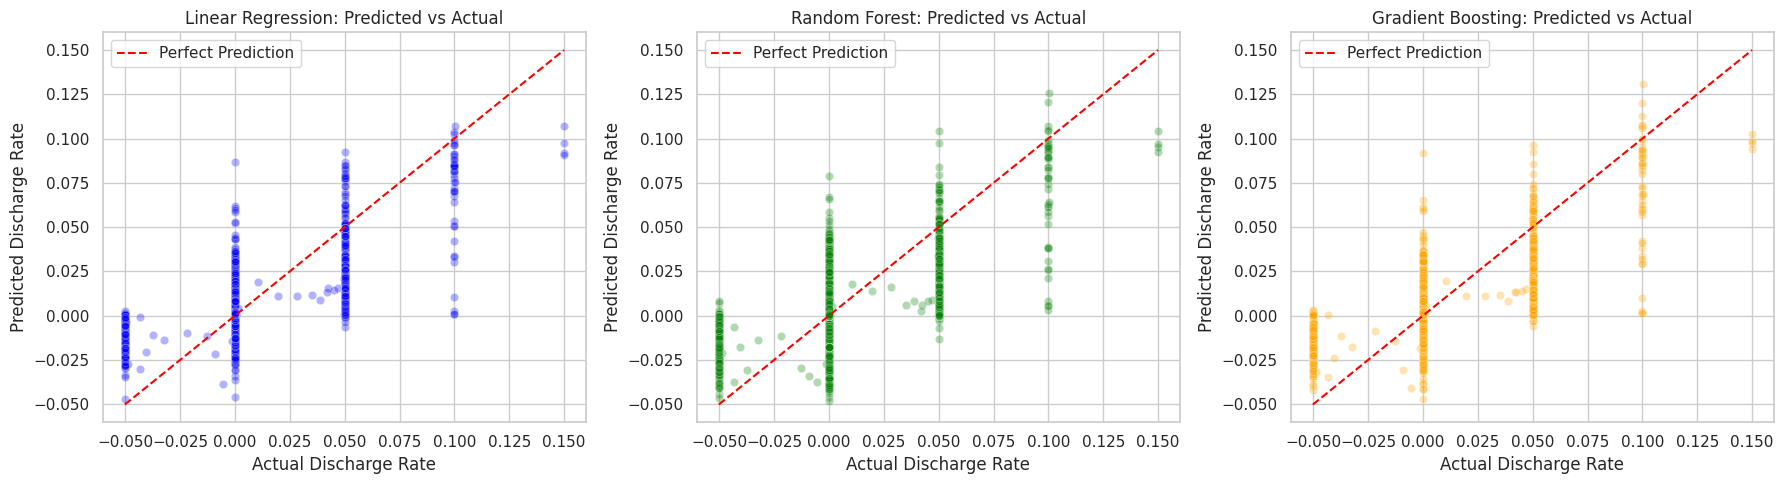

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 1: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Step 2: Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': lr_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
})

# Step 3: Determine min and max for consistent diagonal
min_val = plot_df['Actual'].min()
max_val = plot_df['Actual'].max()

# Step 4: Plot all models with diagonal reference
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=plot_df['Actual'], y=plot_df['Linear Regression'], alpha=0.3, color='blue')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Discharge Rate")
plt.ylabel("Predicted Discharge Rate")
plt.legend()
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=plot_df['Actual'], y=plot_df['Random Forest'], alpha=0.3, color='green')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Discharge Rate")
plt.ylabel("Predicted Discharge Rate")
plt.legend()
plt.grid(True)

# Gradient Boosting
plt.subplot(1, 3, 3)
sns.scatterplot(x=plot_df['Actual'], y=plot_df['Gradient Boosting'], alpha=0.3, color='orange')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Gradient Boosting: Predicted vs Actual")
plt.xlabel("Actual Discharge Rate")
plt.ylabel("Predicted Discharge Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Model Performance Overview: Predicted vs Actual Discharge Rate

**Axes Explanation**  
- **X-axis**: Actual discharge rate (% SoC per second)  
- **Y-axis**: Predicted discharge rate (% SoC per second)  

> 🎯 **Goal**: To assess how well the model's predictions align with actual values.  
> Ideally, all points should lie on the diagonal line where **Predicted = Actual**.

---

## 1. Linear Regression: Predicted vs Actual
- **Color**: Blue  
- **Pattern**: Points show a general linear trend but with noticeable spread.

### 📊 Interpretation:
- The model captures the **overall direction** of the relationship.
- There is **significant variance**, with many predictions deviating from the actual values.
- This suggests **limited accuracy**, particularly with **nonlinear patterns** in the data.

---

## 2. Random Forest: Predicted vs Actual
- **Color**: Green  
- **Pattern**: Points are more **tightly clustered around the diagonal**.

### 📊 Interpretation:
- Random Forest handles **nonlinear relationships** better than Linear Regression.
- The **tighter clustering** around the diagonal indicates **lower prediction error**.
- It likely **outperforms Linear Regression** in both **R²** and **RMSE**.

---

## 3. Gradient Boosting: Predicted vs Actual
- **Color**: Orange  
- **Pattern**: Similar to Random Forest, with **tight clustering near the diagonal**.

### 📊 Interpretation:
- Gradient Boosting is known for **high accuracy** and **robustness to overfitting**.
- The plot suggests it’s doing a **great job predicting discharge rate**.
- If the clustering is **even tighter** than Random Forest, this may be your **best-performing model**.

---
